In [1]:
#%reset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import cmocean



## North Atlantic

In [2]:
#polygons = ('000','016','036','063','017','022','051','053','072')
polygonsA = ('0','16','36','63','17','22','51','53','72')


polygonsB = ('201','214','255','305','334','335','156','172','')

len(polygonsB)


9

skip
skip
skip


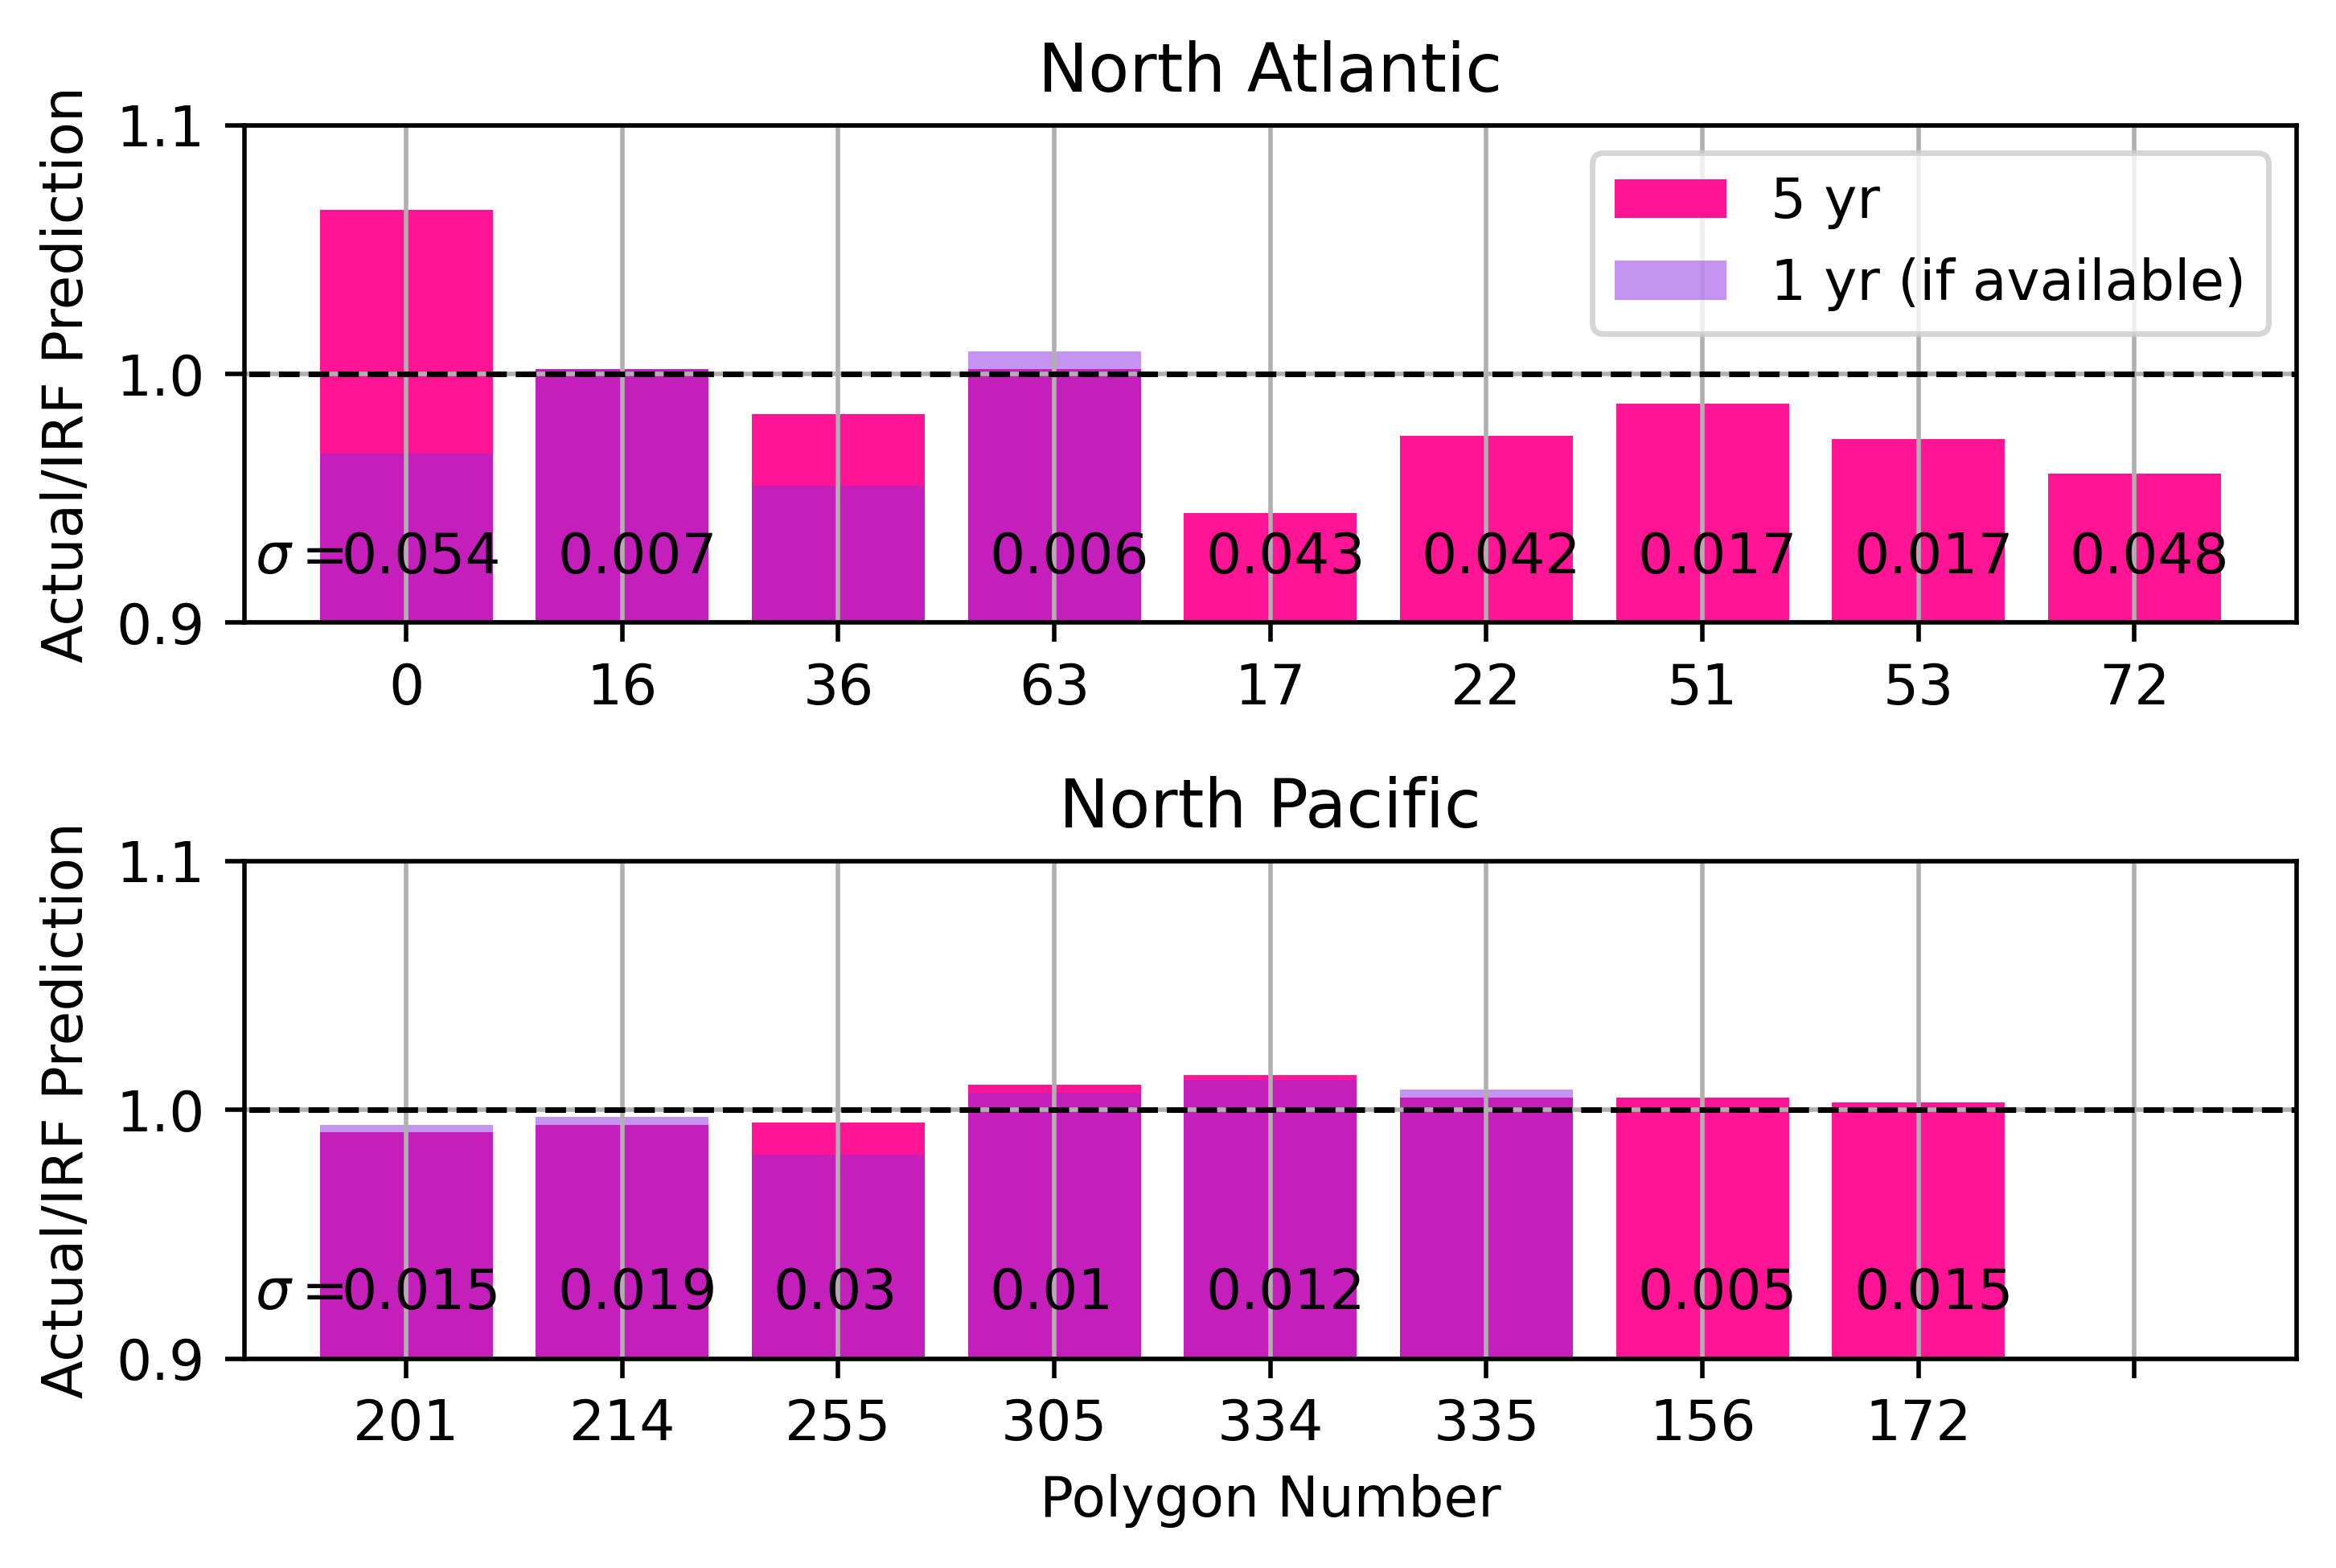

In [3]:



fig = plt.figure(figsize=(6,4),dpi=500) 

# create dataset
ratio_1yr_A = [0.968, 1.002, 0.955, 1.009, np.nan, np.nan, np.nan, np.nan, np.nan]
ratio_5yr_A = [1.066, 1.002, 0.984, 1.002, 0.944,  0.975,  0.988,  0.974,  0.960]
stddev_A    = [0.054, 0.007, np.nan, 0.006, 0.043, 0.042,  0.017,  0.017,  0.048]

ratio_1yr_B = [0.994, 0.997, 0.982, 1.007, 1.012, 1.008, np.nan, np.nan, np.nan]
ratio_5yr_B = [0.991, 0.994, 0.995, 1.010, 1.014, 1.005, 1.005,  1.003,  np.nan]
stddev_B    = [0.015, 0.019, 0.030, 0.010, 0.012, np.nan, 0.005, 0.015,  np.nan]
x_pos_A = np.arange(len(polygonsA))

ax1 = fig.add_subplot(2,1,1)
plt.bar(x_pos_A, ratio_5yr_A, color = 'deeppink', label = '5 yr')
plt.bar(x_pos_A, ratio_1yr_A, color = 'blueviolet', alpha=0.5, label= '1 yr (if available)')
plt.plot(np.linspace(-1,9,11),np.linspace(1,1,11),'--k',linewidth=1)
plt.title('North Atlantic')
plt.ylabel('Actual/IRF Prediction')
plt.legend(loc='upper right')


plt.ylim([0.9,1.1]); plt.grid(); plt.xlim([-.75,8.75])
ax1.set_xticks(x_pos_A, polygonsA)
for i in x_pos_A:
    if i ==2:
        print('skip')
    else:
        ax1.text(i-0.3,0.92,stddev_A[i])

ax1.text(0-0.7,0.92,"$\\sigma=$")

ax2 = fig.add_subplot(2,1,2)
x_pos_B = np.arange(len(polygonsB))
plt.bar(x_pos_B, ratio_5yr_B, color = 'deeppink', label = '5 yr')
plt.bar(x_pos_B, ratio_1yr_B, color = 'blueviolet', alpha=0.5, label= '1 yr if available')
plt.plot(np.linspace(-1,9,11),np.linspace(1,1,11),'--k',linewidth=1)
plt.title('North Pacific')
plt.xlabel('Polygon Number')
plt.ylabel('Actual/IRF Prediction')
plt.ylim([0.9,1.1]); plt.grid(); plt.xlim([-.75,8.75])

ax2.set_xticks(x_pos_B, polygonsB)
for i in x_pos_B:
    if i == 5:
        print("skip")
    elif i == 8:
        print("skip")
    else:
        ax2.text(i-0.3,0.92,stddev_B[i])

ax2.text(0-0.7,0.92,"$\\sigma=$")


plt.tight_layout()

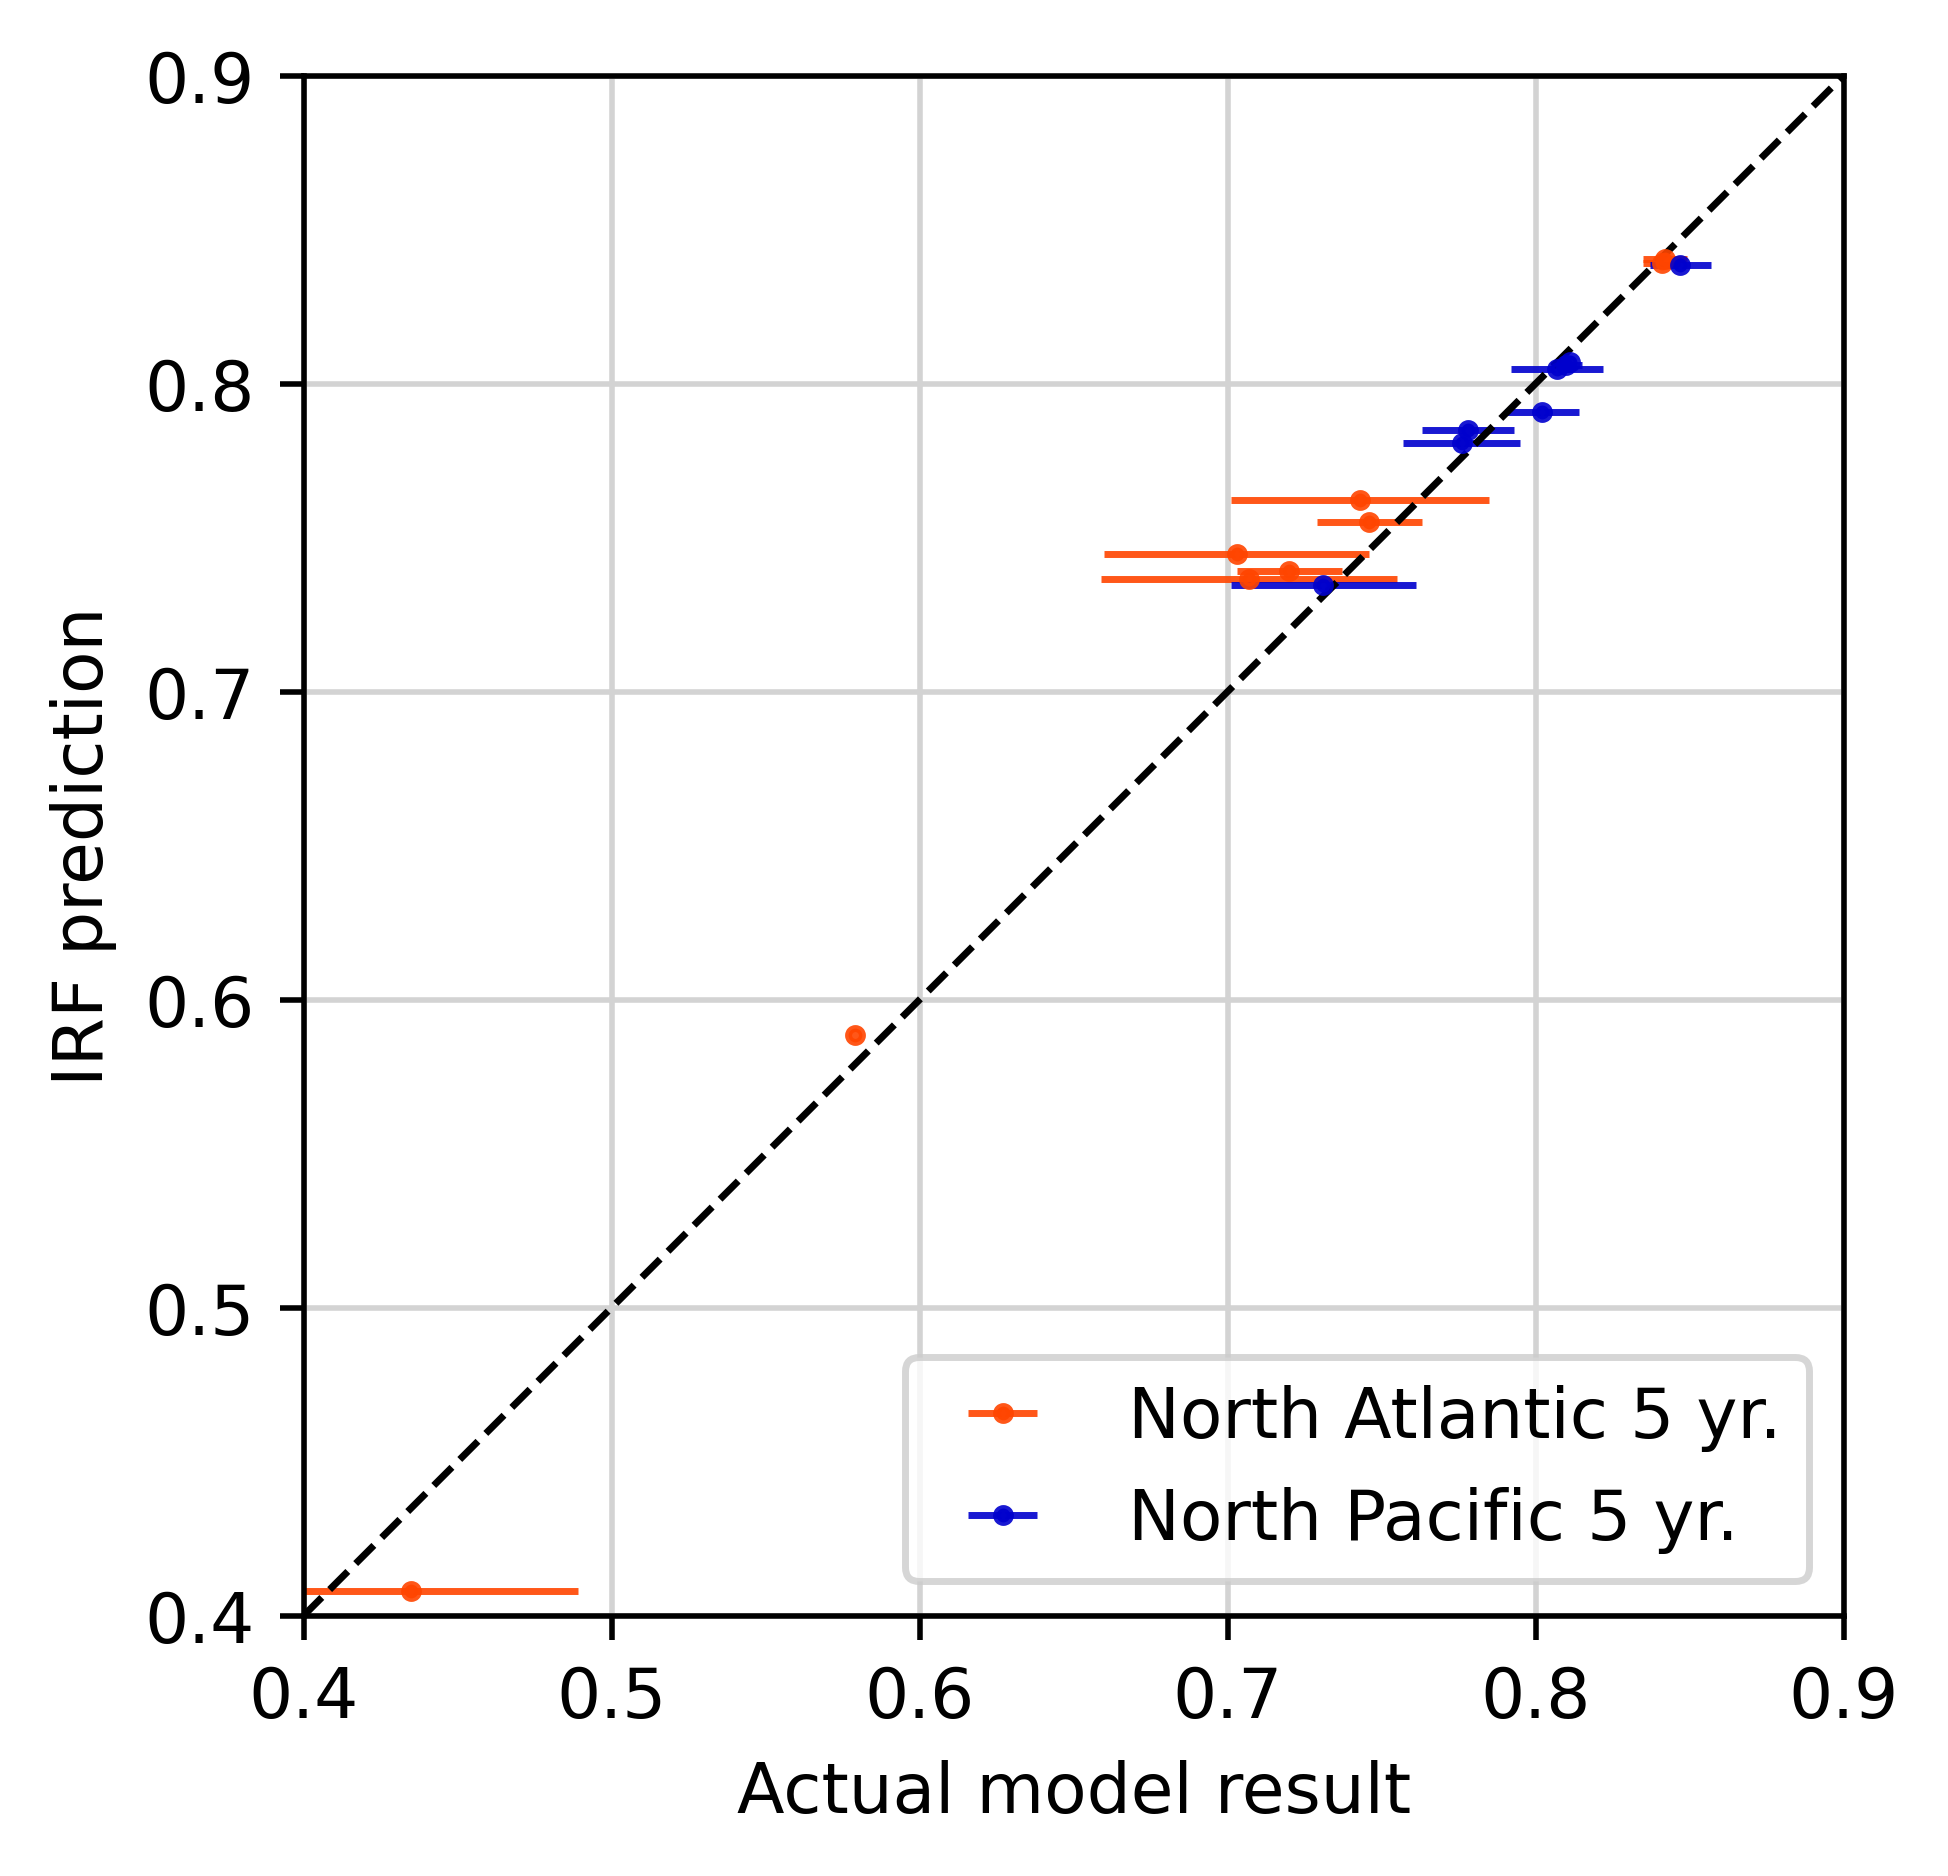

In [4]:




fig = plt.figure(figsize=(4,4),dpi=500) 

# create dataset
actual_1yr_A = [0.404, 0.843, 0.572, 0.846, np.nan, np.nan, np.nan, np.nan, np.nan]
actual_5yr_A = [0.435, 0.842, 0.579, 0.841, 0.703,  0.743,  0.746,  0.720,  0.707]
IRF_1yr_A    = np.array(actual_1yr_A)/np.array(ratio_1yr_A)
IRF_5yr_A    = np.array(actual_5yr_A)/np.array(ratio_5yr_A)

actual_1yr_B = [0.785, 0.784, 0.742, 0.845, 0.803, 0.815, np.nan, np.nan, np.nan]
actual_5yr_B = [0.778, 0.776, 0.731, 0.847, 0.802, 0.811, 0.810,  0.807,  np.nan]
IRF_1yr_B    = np.array(actual_1yr_B)/np.array(ratio_1yr_B)
IRF_5yr_B    = np.array(actual_5yr_B)/np.array(ratio_5yr_B)

size=2
#plt.scatter(actual_5yr_A, IRF_5yr_A, color = 'deeppink', alpha=0.5, label = '5 yr', s=size)
plt.errorbar(actual_5yr_A, IRF_5yr_A,  xerr=stddev_A, color = 'orangered', alpha=0.9, fmt="o", label='North Atlantic 5 yr.',ms=size,lw=1)
#plt.scatter(actual_1yr_A, IRF_1yr_A, color = 'blueviolet', alpha=0.5, label= '1 yr (if available)', s = 40)

# plt.scatter(actual_5yr_B, IRF_5yr_B, color = 'deeppink', alpha=0.5,  s =size)
plt.errorbar(actual_5yr_B, IRF_5yr_B,  xerr=stddev_B, color = 'mediumblue', alpha=0.9, fmt="o", label='North Pacific 5 yr.',ms=size,lw=1)

#plt.scatter(actual_1yr_B, IRF_1yr_B, color = 'blueviolet', alpha=0.5,  s = 40)

plt.xlabel('Actual model result'); plt.ylabel('IRF prediction')
plt.legend(loc='lower right')
plt.xlim([.4,.9]); plt.ylim([.4, .9])
plt.plot(np.linspace(.4,.9,10),np.linspace(.4,.9,10),'--k',linewidth=1)
plt.grid(c='lightgrey')
# plt.ylim([0.9,1.1]); plt.grid(); plt.xlim([-.75,8.75])
# ax1.set_xticks(x_pos_A, polygonsA)
# for i in x_pos_A:
#     if i ==2:
#         print('skip')
#     else:
#         ax1.text(i-0.3,0.92,stddev_A[i])

# ax1.text(0-0.7,0.92,"$\\sigma=$")

# ax2 = fig.add_subplot(2,1,2)
# x_pos_B = np.arange(len(polygonsB))
# plt.bar(x_pos_B, ratio_5yr_B, color = 'deeppink', label = '5 yr')
# plt.bar(x_pos_B, ratio_1yr_B, color = 'blueviolet', alpha=0.5, label= '1 yr if available')
# plt.plot(np.linspace(-1,9,11),np.linspace(1,1,11),'--k',linewidth=1)
# plt.title('North Pacific')
# plt.xlabel('Polygon Number')
# plt.ylabel('Actual/IRF Prediction')
# plt.ylim([0.9,1.1]); plt.grid(); plt.xlim([-.75,8.75])

# ax2.set_xticks(x_pos_B, polygonsB)
# for i in x_pos_B:
#     if i == 5:
#         print("skip")
#     elif i == 8:
#         print("skip")
#     else:
#         ax2.text(i-0.3,0.92,stddev_B[i])

# ax2.text(0-0.7,0.92,"$\\sigma=$")

plt.gca().set_aspect('equal')# plt.tight_layout()

## North Pacific¶

In [ ]:
polygons = ['051','064','105','155','184','185','006','022']
